In [1]:
# CREATING A NEW FILE BECAUSE I FACED 2 ISSUES.  
# My Ram memory could not stand the first notebook. I cheked how was the cpu power trought the "task
# adminitrator" and windows indazador was taking 30% of that. I disabled it. 
# Besides, I opened the notebook with Visual Studio code and I type in the second cell to get an error 
# to avoid the automatic run. I type a # in the heavy cells too. 

## GNOD Project part 4 & 5

In [2]:
from time import sleep
from random import randint
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn import cluster

I need: song name, artists name, uri, audio features, album?

In [3]:
#!pip install spotipy
# It was already installed, I runned again becasuse I got an error in the import from cell. And that works. 

In [4]:
secrets_file = open("secrets.txt","r")

In [5]:
string = secrets_file.read()

We are splitting the text from the secrets.txt. Why don't we paste the text? Because we don't want our text be in a public file. So we are taking the text with the code below.

In [6]:
secrets_dict={} #convert the clientid and clientsecrets into dictionaries
for line in string.split('\n'):
    if len(line) > 0: #if I don't have an empty line do next line.
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip() #.strip remove xtra spaces.

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [8]:
# Selecting the function and our playlist.

In [9]:
playlist = sp.user_playlist_tracks("spotify", "2JkIg36K6GI4lUjbVKmmRR")

In [10]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/2JkIg36K6GI4lUjbVKmmRR/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2014-03-31T17:40:51Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/11121928114'},
    'href': 'https://api.spotify.com/v1/users/11121928114',
    'id': '11121928114',
    'type': 'user',
    'uri': 'spotify:user:11121928114'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6xnvNmSzmeOE1bLKnYXKW3'},
       'href': 'https://api.spotify.com/v1/artists/6xnvNmSzmeOE1bLKnYXKW3',
       'id': '6xnvNmSzmeOE1bLKnYXKW3',
       'name': 'The Specials',
       'type': 'artist',
       'uri': 'spotify:artist:6xnvNmSzmeOE1bLKnYXKW3'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6rrLvfVJh2GoIY36EphGSo'},
     'href': 'https://api.spotify.com/v

In [11]:
len(playlist) #why 7? which 7?

7

In [12]:
len(playlist["items"])

100

In [13]:
playlist["total"]

446

In [14]:
playlist['next'] #What is for this function?

'https://api.spotify.com/v1/playlists/2JkIg36K6GI4lUjbVKmmRR/tracks?offset=100&limit=100&additional_types=track'

                                / ERIN PART STARTS /

In [15]:
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

In [16]:
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [17]:
get_name_artist_from_playlist_item(playlist["items"][0])

[('A Message to You Rudy - 2002 Remastered Version', 'The Specials')]

In [18]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [19]:
%%time
alltracks = get_playlist_tracks("2JkIg36K6GI4lUjbVKmmRR")

CPU times: total: 15.6 ms
Wall time: 10.9 s


In [20]:
len(alltracks)

446

why the otput is song name and artist name. I prefer taking field by field.

                                 / ERIN PART ENDS /

#### Looking for the songs (again)

In [21]:
playlist["items"] 
# this displays a giant list with a dictionary inside [{ we need to take off the list
# and get the dictionary remaing to extract the info we need for the next step. 

[{'added_at': '2014-03-31T17:40:51Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/11121928114'},
   'href': 'https://api.spotify.com/v1/users/11121928114',
   'id': '11121928114',
   'type': 'user',
   'uri': 'spotify:user:11121928114'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6xnvNmSzmeOE1bLKnYXKW3'},
      'href': 'https://api.spotify.com/v1/artists/6xnvNmSzmeOE1bLKnYXKW3',
      'id': '6xnvNmSzmeOE1bLKnYXKW3',
      'name': 'The Specials',
      'type': 'artist',
      'uri': 'spotify:artist:6xnvNmSzmeOE1bLKnYXKW3'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6rrLvfVJh2GoIY36EphGSo'},
    'href': 'https://api.spotify.com/v1/albums/6rrLvfVJh2GoIY36EphGSo',
    'id': '6rrLvfVJh2GoIY36EphGSo',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0

In [22]:
playlist["items"][0] # With the index 0 we are selecting all the info inside of the giant list.  

{'added_at': '2014-03-31T17:40:51Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/11121928114'},
  'href': 'https://api.spotify.com/v1/users/11121928114',
  'id': '11121928114',
  'type': 'user',
  'uri': 'spotify:user:11121928114'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'compilation',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6xnvNmSzmeOE1bLKnYXKW3'},
     'href': 'https://api.spotify.com/v1/artists/6xnvNmSzmeOE1bLKnYXKW3',
     'id': '6xnvNmSzmeOE1bLKnYXKW3',
     'name': 'The Specials',
     'type': 'artist',
     'uri': 'spotify:artist:6xnvNmSzmeOE1bLKnYXKW3'}],
   'available_markets': [],
   'external_urls': {'spotify': 'https://open.spotify.com/album/6rrLvfVJh2GoIY36EphGSo'},
   'href': 'https://api.spotify.com/v1/albums/6rrLvfVJh2GoIY36EphGSo',
   'id': '6rrLvfVJh2GoIY36EphGSo',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273d3c9646bb20d1b

In [23]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [24]:
playlist["items"][0]["track"]["name"] #Getting the song name.

'A Message to You Rudy - 2002 Remastered Version'

#### Looking for the artist name

In [25]:
#Same process than with the song, but here I will show just the last code line. 
playlist["items"][0]["track"]["artists"][0]["name"]

'The Specials'

#### Looking for the uri.

In [26]:
playlist["items"][0]["track"]["uri"]

'spotify:track:2EwEtZrsBpjLmwhe7GCGhs'

#### 1º Dataframe

In [27]:
song_name= []
artist = []
uri = []

for i in range(len(alltracks)):
    song_name.append (alltracks[i]["track"]["name"]) # DON'T ["items"][0]...
    artist.append (alltracks[i]["track"]["artists"][0]["name"]) # DON'T ["items"][0]...
    uri.append (alltracks[i]["track"]["uri"]) # DON'T ["items"][0]...

In [28]:
import pandas as pd
df_playlist = pd.DataFrame({"song":song_name, "artist":artist, "uri":uri})

In [29]:
df_playlist

,song,artist,uri
0,A Message to You Rudy - 2002 Remastered Version,The Specials,spotify:track:2EwEtZrsBpjLmwhe7GCGhs
1,A Minha Menina,Os Mutantes,spotify:track:3CCGsOj2efotChiScMmCWg
2,A Thousand Miles,Vanessa Carlton,spotify:track:61RLX64Dro2BLHf6Rr3xmM
3,Achy Breaky Heart,Billy Ray Cyrus,spotify:track:2KoWxA1U5GlKgpQOeeuJtQ
4,All That She Wants,Ace of Base,spotify:track:4PifbP29I4IF0I437LTMW3
...,...,...,...
441,Fly Me To The Moon,Frank Sinatra,spotify:track:2dR5WkrpwylTuT3jRWNufa
442,Vamos A La Playa (Radio Edit),Loona,spotify:track:4IT4GrssOK7GOMUvHTRc1m
443,It's Like That,Run–D.M.C.,spotify:track:0CtkjgZpkgnW7U6WmHsakD
444,Englishman In New York,Sting,spotify:track:4KFM3A5QF2IMcc6nHsu3Wp


In [30]:
%%time
audio_features = []

for i in df_playlist["uri"]:
    audio_features.append (sp.audio_features(i))

SpotifyException: http status: 400, code:-1 - Unsupported URL / URI., reason: None

In [31]:
audio_features_df = pd.DataFrame(audio_features)

In [32]:
print(audio_features)

[[{'danceability': 0.906, 'energy': 0.45, 'key': 0, 'loudness': -8.003, 'mode': 1, 'speechiness': 0.0627, 'acousticness': 0.149, 'instrumentalness': 0.000232, 'liveness': 0.168, 'valence': 0.969, 'tempo': 103.476, 'type': 'audio_features', 'id': '2EwEtZrsBpjLmwhe7GCGhs', 'uri': 'spotify:track:2EwEtZrsBpjLmwhe7GCGhs', 'track_href': 'https://api.spotify.com/v1/tracks/2EwEtZrsBpjLmwhe7GCGhs', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2EwEtZrsBpjLmwhe7GCGhs', 'duration_ms': 172600, 'time_signature': 4}], [{'danceability': 0.455, 'energy': 0.93, 'key': 7, 'loudness': -3.21, 'mode': 1, 'speechiness': 0.126, 'acousticness': 0.0568, 'instrumentalness': 0, 'liveness': 0.464, 'valence': 0.429, 'tempo': 91.41, 'type': 'audio_features', 'id': '3CCGsOj2efotChiScMmCWg', 'uri': 'spotify:track:3CCGsOj2efotChiScMmCWg', 'track_href': 'https://api.spotify.com/v1/tracks/3CCGsOj2efotChiScMmCWg', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3CCGsOj2efotChiScMmCWg', 'duration_m

In [33]:
import pandas as pd
from pandas import json_normalize

audio_features_df = json_normalize(audio_features_df[0])

In [34]:
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.906,0.450,0,-8.003,1,0.0627,0.149000,0.000232,0.1680,0.969,103.476,audio_features,2EwEtZrsBpjLmwhe7GCGhs,spotify:track:2EwEtZrsBpjLmwhe7GCGhs,https://api.spotify.com/v1/tracks/2EwEtZrsBpjL...,https://api.spotify.com/v1/audio-analysis/2EwE...,172600,4
1,0.455,0.930,7,-3.210,1,0.1260,0.056800,0.000000,0.4640,0.429,91.410,audio_features,3CCGsOj2efotChiScMmCWg,spotify:track:3CCGsOj2efotChiScMmCWg,https://api.spotify.com/v1/tracks/3CCGsOj2efot...,https://api.spotify.com/v1/audio-analysis/3CCG...,284987,4
2,0.520,0.664,11,-9.216,1,0.0332,0.383000,0.000001,0.1620,0.383,94.983,audio_features,61RLX64Dro2BLHf6Rr3xmM,spotify:track:61RLX64Dro2BLHf6Rr3xmM,https://api.spotify.com/v1/tracks/61RLX64Dro2B...,https://api.spotify.com/v1/audio-analysis/61RL...,237040,4
3,0.787,0.611,9,-9.114,1,0.0310,0.066800,0.000000,0.1300,0.961,121.785,audio_features,2KoWxA1U5GlKgpQOeeuJtQ,spotify:track:2KoWxA1U5GlKgpQOeeuJtQ,https://api.spotify.com/v1/tracks/2KoWxA1U5GlK...,https://api.spotify.com/v1/audio-analysis/2KoW...,202867,4
4,0.795,0.497,11,-13.661,1,0.0659,0.005710,0.000068,0.1180,0.857,93.744,audio_features,4PifbP29I4IF0I437LTMW3,spotify:track:4PifbP29I4IF0I437LTMW3,https://api.spotify.com/v1/tracks/4PifbP29I4IF...,https://api.spotify.com/v1/audio-analysis/4Pif...,213040,4
5,0.467,0.958,4,-4.808,0,0.0775,0.000479,0.199000,0.2990,0.701,145.920,audio_features,5xC8uOesnn0udeXAYlAnoY,spotify:track:5xC8uOesnn0udeXAYlAnoY,https://api.spotify.com/v1/tracks/5xC8uOesnn0u...,https://api.spotify.com/v1/audio-analysis/5xC8...,180880,4
6,0.691,0.956,2,-4.361,0,0.0621,0.000200,0.000912,0.0571,0.792,131.024,audio_features,1wVriauI0fVMvpGnoG6vag,spotify:track:1wVriauI0fVMvpGnoG6vag,https://api.spotify.com/v1/tracks/1wVriauI0fVM...,https://api.spotify.com/v1/audio-analysis/1wVr...,222640,4
7,0.933,0.528,5,-6.472,0,0.1610,0.112000,0.312000,0.1630,0.754,109.967,audio_features,5vdp5UmvTsnMEMESIF2Ym7,spotify:track:5vdp5UmvTsnMEMESIF2Ym7,https://api.spotify.com/v1/tracks/5vdp5UmvTsnM...,https://api.spotify.com/v1/audio-analysis/5vdp...,214653,4
8,0.756,0.737,0,-4.796,0,0.0312,0.184000,0.000103,0.4850,0.892,92.972,audio_features,52SrRaRC2SlJ2dno1flkg2,spotify:track:52SrRaRC2SlJ2dno1flkg2,https://api.spotify.com/v1/tracks/52SrRaRC2SlJ...,https://api.spotify.com/v1/audio-analysis/52Sr...,210387,4
9,0.629,0.565,7,-10.836,1,0.0271,0.239000,0.000340,0.2590,0.585,88.006,audio_features,6nzZXE4iUSpG4LSlSGNH5e,spotify:track:6nzZXE4iUSpG4LSlSGNH5e,https://api.spotify.com/v1/tracks/6nzZXE4iUSpG...,https://api.spotify.com/v1/audio-analysis/6nzZ...,202133,4


#### Looking for the audio features.  
#### In second dataframe before to concatenate with the first one (song name, artist, uri)

In [35]:
%%time
alltracks = get_playlist_tracks ("2JkIg36K6GI4lUjbVKmmRR")
len(alltracks)

CPU times: total: 31.2 ms
Wall time: 9.49 s


446

In [36]:
audio_features_df = pd.DataFrame(audio_features)

In [37]:
audio_features_df

,0
0,"{'danceability': 0.906, 'energy': 0.45, 'key':..."
1,"{'danceability': 0.455, 'energy': 0.93, 'key':..."
2,"{'danceability': 0.52, 'energy': 0.664, 'key':..."
3,"{'danceability': 0.787, 'energy': 0.611, 'key'..."
4,"{'danceability': 0.795, 'energy': 0.497, 'key'..."
5,"{'danceability': 0.467, 'energy': 0.958, 'key'..."
6,"{'danceability': 0.691, 'energy': 0.956, 'key'..."
7,"{'danceability': 0.933, 'energy': 0.528, 'key'..."
8,"{'danceability': 0.756, 'energy': 0.737, 'key'..."
9,"{'danceability': 0.629, 'energy': 0.565, 'key'..."


In [38]:
import pandas as pd
from pandas import json_normalize

audio_features_df2 = json_normalize(audio_features_df[0])

In [42]:
final_df = pd.concat([df_playlist, audio_features_df], axis=1)

In [44]:
final_df

,song,artist,uri,0
0,A Message to You Rudy - 2002 Remastered Version,The Specials,spotify:track:2EwEtZrsBpjLmwhe7GCGhs,"{'danceability': 0.906, 'energy': 0.45, 'key':..."
1,A Minha Menina,Os Mutantes,spotify:track:3CCGsOj2efotChiScMmCWg,"{'danceability': 0.455, 'energy': 0.93, 'key':..."
2,A Thousand Miles,Vanessa Carlton,spotify:track:61RLX64Dro2BLHf6Rr3xmM,"{'danceability': 0.52, 'energy': 0.664, 'key':..."
3,Achy Breaky Heart,Billy Ray Cyrus,spotify:track:2KoWxA1U5GlKgpQOeeuJtQ,"{'danceability': 0.787, 'energy': 0.611, 'key'..."
4,All That She Wants,Ace of Base,spotify:track:4PifbP29I4IF0I437LTMW3,"{'danceability': 0.795, 'energy': 0.497, 'key'..."
...,...,...,...,...
441,Fly Me To The Moon,Frank Sinatra,spotify:track:2dR5WkrpwylTuT3jRWNufa,NaN
442,Vamos A La Playa (Radio Edit),Loona,spotify:track:4IT4GrssOK7GOMUvHTRc1m,NaN
443,It's Like That,Run–D.M.C.,spotify:track:0CtkjgZpkgnW7U6WmHsakD,NaN
444,Englishman In New York,Sting,spotify:track:4KFM3A5QF2IMcc6nHsu3Wp,NaN


In [47]:
final_df.to_csv('File’s name', index=False)

In [50]:
final_df.to_excel('final_df.xlsx', index=False)

### GNOD - part 4

In [51]:
import pandas as pd

In [52]:
big_playlist = pd.read_csv("Big_playlist.csv")

In [53]:
num_duplicates = big_playlist.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 597


In [54]:
big_playlist = big_playlist.drop_duplicates()

In [55]:
big_playlist.shape

(10122, 15)

In [56]:
big_playlist.columns

Index(['Title', 'Artist', 'ID', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

##### y= we don't have target in this exercise. 

In [57]:
big_playlist_df = pd.DataFrame(big_playlist)

In [58]:
X = big_playlist_df.drop(["Title", "Artist", "ID"], axis=1)

#### ESCALE

In [59]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns= X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.581402,0.394330,-0.058830,0.228037,-1.573140,-0.332571,0.867466,-0.449990,2.776486,1.233007,0.574157,-1.043718
1,-0.399765,0.220606,-0.058830,0.329637,0.635671,-0.455677,-0.291591,-0.449791,-0.610318,0.005977,-1.556023,-0.375513
2,-0.343395,-0.036031,-0.339983,0.419970,0.635671,-0.489873,-0.490287,-0.449831,-0.043319,-1.127814,-1.283723,0.182861
3,0.151408,0.252192,-0.339983,-0.420906,0.635671,-0.476194,0.394812,-0.440191,0.400314,1.214359,0.776842,0.343586
4,1.065854,1.247155,1.628085,0.287049,-1.573140,-0.011127,-0.743172,0.191698,-0.037242,1.542561,1.252245,-1.373193


In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

C:\Users\IUREK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [61]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     816
1    3199
2    6107
dtype: int64

In [62]:
clusters

array([2, 1, 1, ..., 0, 0, 0])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

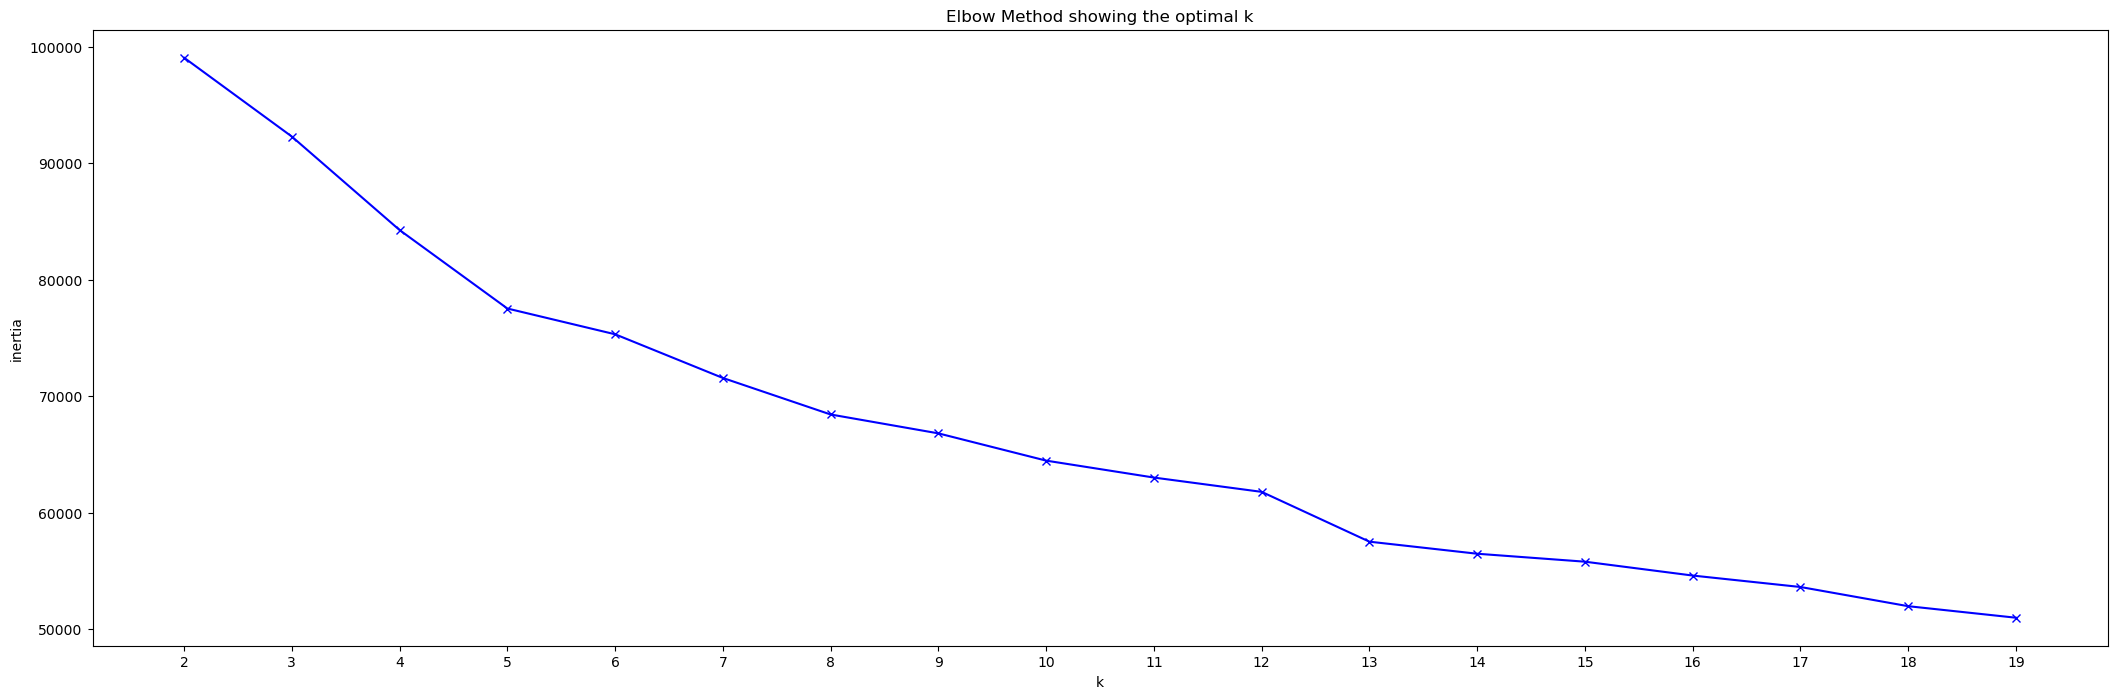

In [63]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init = "auto", # n_init = "auto" ignoring the warnings.
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

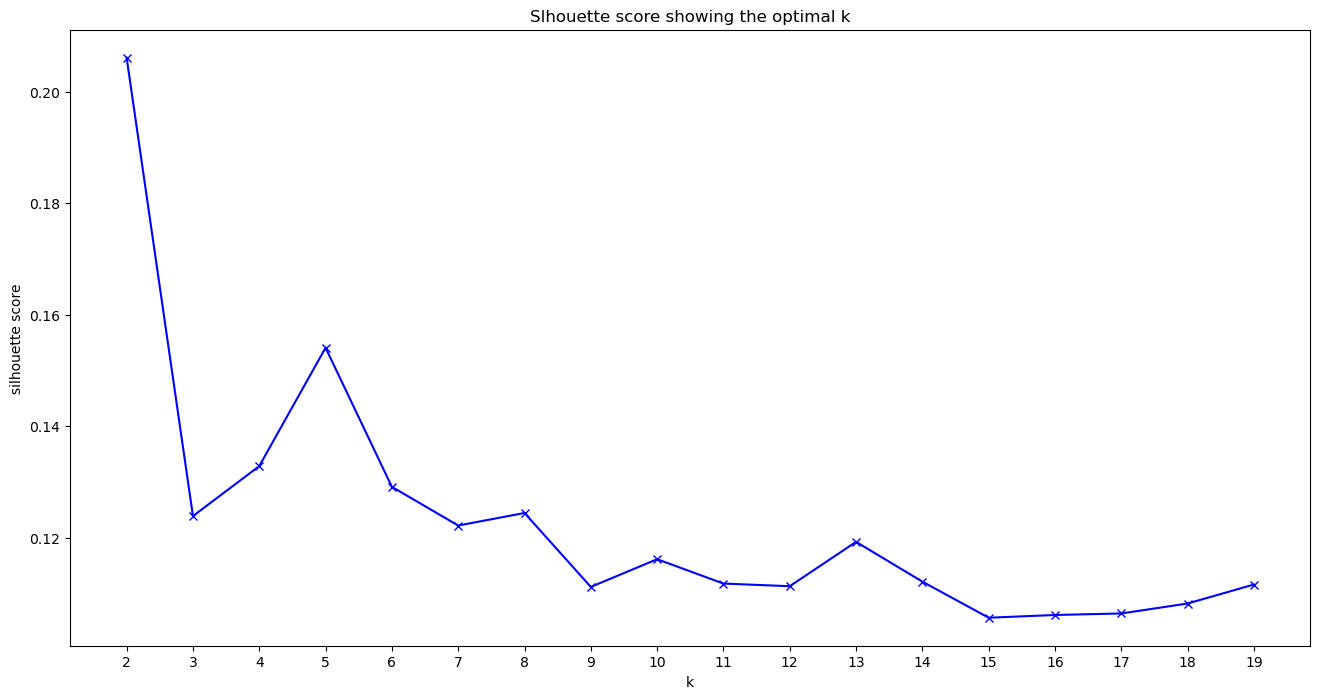

In [64]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init = "auto",
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [65]:
kmeans = cluster.KMeans(n_clusters= 6)
kmeans.fit(X)

C:\Users\IUREK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [66]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X)
clusters

array([1, 4, 0, ..., 3, 5, 3])

In [67]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2912
1    2081
2     336
3    1359
4    3406
5      28
dtype: int64

#### CREATING THE DATAFRAME.

In [68]:
import pandas as pd
clusters_df = pd.DataFrame(clusters) # FIRST Q, cluster must be converted into df before concatenate?

In [69]:
clusters_df.head()

,0
0,1
1,4
2,0
3,0
4,1


In [70]:
clusters_df = clusters_df.rename(columns= {0: 'Cluster'})

In [71]:
clusters_df

,Cluster
0,1
1,4
2,0
3,0
4,1
...,...
10117,3
10118,0
10119,3
10120,5


In [72]:
big_playlist_df = big_playlist_df.reset_index()

In [73]:
cl_playlist = pd.concat([big_playlist_df[['Title', 'Artist']], clusters_df], axis=1)  #1708rows

In [74]:
cl_playlist

,Title,Artist,Cluster
0,You're The One - Un mal pour un bien,Petula Clark,1
1,Doctor My Eyes,Jackson Browne,4
2,Falling in Love at a Coffee Shop,Landon Pigg,0
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,0
4,Summertime Blues,Eddie Cochran,1
...,...,...,...
10117,Elements (Deluxe),Ludovico Einaudi,3
10118,Moon Safari,Air,0
10119,Islands - Essential Einaudi,Ludovico Einaudi,3
10120,Liquid Mind II: Slow World,Liquid Mind,5


In [75]:
cl_playlist

,Title,Artist,Cluster
0,You're The One - Un mal pour un bien,Petula Clark,1
1,Doctor My Eyes,Jackson Browne,4
2,Falling in Love at a Coffee Shop,Landon Pigg,0
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,0
4,Summertime Blues,Eddie Cochran,1
...,...,...,...
10117,Elements (Deluxe),Ludovico Einaudi,3
10118,Moon Safari,Air,0
10119,Islands - Essential Einaudi,Ludovico Einaudi,3
10120,Liquid Mind II: Slow World,Liquid Mind,5


In [76]:
#Making sure the values in the cluster are recognized as a number.
cl_playlist.dtypes

Title      object
Artist     object
Cluster     int32
dtype: object

In [77]:
clusters_df.isnull

<bound method DataFrame.isnull of        Cluster
0            1
1            4
2            0
3            0
4            1
...        ...
10117        3
10118        0
10119        3
10120        5
10121        3

[10122 rows x 1 columns]>

In [78]:
cl_playlist.to_csv('clus_playlist.csv', index = False)

In [79]:
# to concatenate two tables is not mandatory to convert to dataframe both. You can use as well series 

In [80]:
# We need this line to finish the lab.

import pickle

with open("model.pkl","wb")as f:
    pickle.dump(kmeans, f)